In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
#baraye split kardan data
from sklearn.preprocessing import MinMaxScaler
#scale mikone data ma ro b masalan 0 o1
from sklearn.metrics import mean_absolute_error,mean_squared_error
#baraye gereftan mean absoulute error o square error
from tensorflow.keras.models import Sequential
#yek layer default sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
#layer dense behesh ezafe mikonim
#dense yani har neuron be tor kamel vasle be ham be surat feed forward
from tensorflow.keras.models import load_model
#baraye in k model save shode ro load konim

In [2]:
df = pd.read_csv('./example_files/fake_reg.csv')
#supervised learning
df#bar asase feature ha mikhaim price ro predict konim

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


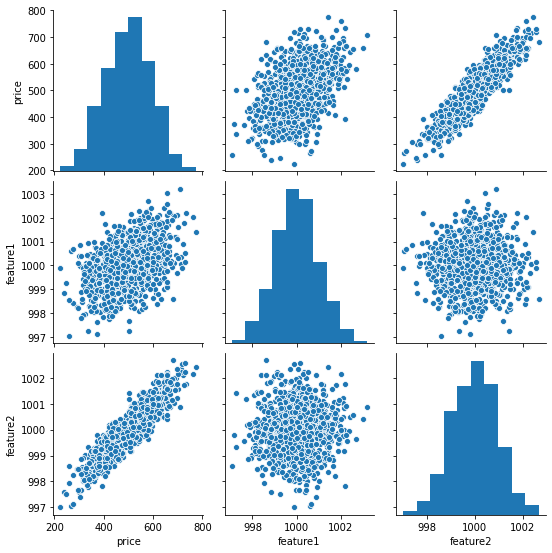

In [3]:
sns.pairplot(df)
#feature 2 b dard nmikhore ya fake hast
#bar asase sheklesh ba price

In [4]:
X = df[['feature1','feature2']].values
X
#bayad data ro tabdil b numpy konim az panda

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [5]:
y = df['price'].values
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#az example train_test_data barmidarim
#random_state mige hamishe ye chizo bardare

In [7]:
X_train.shape

(700, 2)

In [8]:
X_test.shape

(300, 2)

In [9]:
help(MinMaxScaler)#komak gereftan baraye tozih

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), de

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)#mohasebe mikone parametri k baraye min o max mikhaym
#faghat ruye train mizanim ta az data leakage test jologiri konim 

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
X_train = scaler.transform(X_train) #montaghe mikone
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [12]:
X_test = scaler.transform(X_test)
X_train.max()#data ma beyne 0 o 1 shode

1.0

In [13]:
model = Sequential([Dense(units=4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])
#units hamun neuron ha hastan
#inja 3 ta layer ezafe mikonim
#yek rahe sakht model

In [23]:
#rahe 2 ezafe karan k ma ham az in ravesh mirim chon mishe edit ya pak kard be sadegi ye #
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))#in layer akhar kheili moheme chon moshakhas mikone chi mikhaym predict
#konim k dar inja ye price hastesh

model.compile(optimizer='rmsprop',loss='mse')
#chan nokte mohem compile dare mesle optimizer va loss
#optimizer hamun gradient decent hast k mamulan adam hast
#loss k taghyir mikone bar asase chizi k mikhaym b dast biarim
#masalan ma mikhaym b min beresim pas bar asase formul hey loss jadid ro migirim o 
#check mikonim k kuchik beshe,masalan hey shibo hesab mikonim ta b sefr berese tu sahmi

for multi-class classification : 
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

for binary classification : 
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

for mean square error regression problem : 
model.compile(optimizer='rmsprop',loss='mse')

In [24]:
model.fit(x=X_train,y=y_train,epochs=250)
#x= yani feature haye k darim train mirim rush
#y ham label ma hast k be un feature ha mortabete (masalan gheymate vaghei ya DOG budan)
#epochs tedade dafaati ke tuye kole dataset mire

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 1ms/sample - loss: 255941.6249
Epoch 2/250
700/700 [==============================] - 0s 83us/sample - loss: 255641.3001
Epoch 3/250
700/700 [==============================] - 0s 89us/sample - loss: 255325.3566
Epoch 4/250
700/700 [==============================] - 0s 89us/sample - loss: 254972.0480
Epoch 5/250
700/700 [==============================] - 0s 77us/sample - loss: 254548.4462
Epoch 6/250
700/700 [==============================] - 0s 81us/sample - loss: 254063.3838
Epoch 7/250
700/700 [==============================] - 0s 56us/sample - loss: 253536.7395
Epoch 8/250
700/700 [==============================] - 0s 66us/sample - loss: 252963.8722
Epoch 9/250
700/700 [==============================] - 0s 66us/sample - loss: 252340.5379
Epoch 10/250
700/700 [==============================] - 0s 58us/sample - loss: 251655.8624
Epoch 11/250
700/700 [==============================] - 0s 65us/sample - loss: 

700/700 [==============================] - 0s 63us/sample - loss: 24.5607
Epoch 184/250
700/700 [==============================] - 0s 68us/sample - loss: 24.4703
Epoch 185/250
700/700 [==============================] - 0s 60us/sample - loss: 24.3463
Epoch 186/250
700/700 [==============================] - 0s 88us/sample - loss: 24.3237
Epoch 187/250
700/700 [==============================] - 0s 61us/sample - loss: 24.6788
Epoch 188/250
700/700 [==============================] - 1s 769us/sample - loss: 24.2163
Epoch 189/250
700/700 [==============================] - 1s 785us/sample - loss: 24.1196
Epoch 190/250
700/700 [==============================] - 0s 84us/sample - loss: 24.4349
Epoch 191/250
700/700 [==============================] - 0s 59us/sample - loss: 24.3565
Epoch 192/250
700/700 [==============================] - 0s 57us/sample - loss: 24.6728
Epoch 193/250
700/700 [==============================] - 0s 69us/sample - loss: 24.0416
Epoch 194/250
700/700 [=====================

In [25]:
loss_df=pd.DataFrame(model.history.history)
pd.DataFrame(model.history.history)
#loss haro behemun neshun mide

,loss
0,255941.624911
1,255641.300089
2,255325.356607
3,254972.048036
4,254548.446161
...,...
245,23.765015
246,24.538955
247,24.149168
248,24.187833


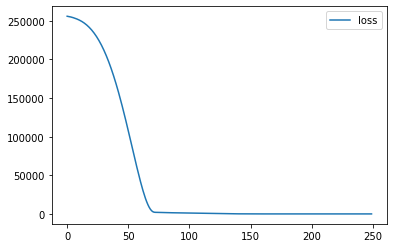

In [26]:
loss_df.plot()

In [31]:
model.evaluate(X_test,y_test)#arzyabi model

300/300 [==============================] - 0s 53us/sample - loss: 24.9454


24.945417887369793

In [32]:
model.evaluate(X_train,y_train)

700/700 [==============================] - 0s 42us/sample - loss: 23.8529


23.852916390555247

In [44]:
test_predictions = model.predict(X_test) #prediction price ro mikone barasase input (X_test)
test_predictions#predict price ro mikhaym ba price vaghei (y_test) moghayese konim

array([[405.20148],
       [623.5742 ],
       [592.15625],
       [572.2146 ],
       [366.47345],
       [579.1841 ],
       [514.994  ],
       [459.06274],
       [549.22125],
       [447.47107],
       [611.8147 ],
       [548.97125],
       [419.01703],
       [408.77588],
       [651.32666],
       [437.23846],
       [508.44965],
       [659.9586 ],
       [662.6282 ],
       [565.55273],
       [334.08246],
       [444.76596],
       [382.41296],
       [378.6534 ],
       [566.5956 ],
       [610.6024 ],
       [532.3694 ],
       [427.78806],
       [655.47754],
       [414.01135],
       [442.58197],
       [485.08502],
       [438.3475 ],
       [681.9011 ],
       [424.7024 ],
       [417.5912 ],
       [501.92923],
       [550.4719 ],
       [509.67883],
       [395.23215],
       [618.63074],
       [416.55646],
       [604.47974],
       [445.9184 ],
       [501.95502],
       [581.7634 ],
       [669.0884 ],
       [490.37573],
       [318.45715],
       [485.38138],


In [45]:
test_predictions = pd.Series(test_predictions.reshape(300)) 
#numpy ro panda mikonim k rahat bashim
#bayad reshape konim ta ba 300 ta k panda entezar dare barabar she
test_predictions

0      405.201477
1      623.574219
2      592.156250
3      572.214600
4      366.473450
          ...    
295    529.011658
296    515.285522
297    609.682251
298    416.888855
299    410.778046
Length: 300, dtype: float32

In [60]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [61]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [62]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [65]:
pred_df.columns=['Test True Y','Model prediction']
pred_df

,Test True Y,Model prediction
0,402.296319,405.201477
1,624.156198,623.574219
2,582.455066,592.156250
3,578.588606,572.214600
4,371.224104,366.473450
...,...,...
295,525.704657,529.011658
296,502.909473,515.285522
297,612.727910,609.682251
298,417.569725,416.888855


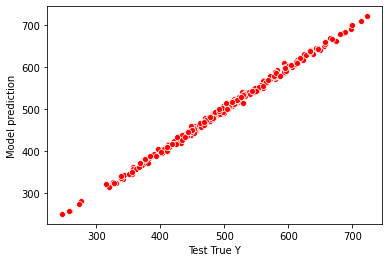

In [73]:
sns.scatterplot(x="Test True Y",y="Model prediction",data=pred_df,color='red')
#x o y ro az data entekhab karde

In [75]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model prediction'])
#ravesh gereftan
#be tor motevaset 4 dollar bala o payinim

3.9983150993871854

In [76]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model prediction'])

24.94542182282859

In [78]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model prediction'])**0.5
#jazr ro mide yani root mean square error

4.994539200249467

In [77]:
df.describe()#inja mean 498 hast k ma kamtar az 1 darsad hastim k khube

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [79]:
new_gem=[[998,1000]]#test ye item jadid tu model

In [80]:
new_gem=scaler.transform(new_gem)#chon model ma scale shode

In [81]:
new_gem

array([[0.14117652, 0.53968792]])

In [82]:
model.predict(new_gem)#pricesh tu in maye hast

array([[419.57574]], dtype=float32)

In [85]:
model.save('my_gem_model.h5')#be surat file model tensorflow hdf5 save mikone

In [86]:
later_model = load_model('my_gem_model.h5')

In [87]:
later_model.predict(new_gem)

array([[419.57574]], dtype=float32)